# E-COMMERCE SALES ANALYSIS 

### The Data:
https://www.kaggle.com/datasets/fahmidachowdhury/e-commerce-sales-analysis

**Description:**

Explore a comprehensive dataset of e-commerce sales, encompassing a variety of product categories, pricing, customer reviews, and sales trends over the past year.

**Columns:**

product_id: Unique identifier for each product.
product_name: Name of the product.
category: Product category.
price: Price of the product.
review_score: Average customer review score (1 to 5).
review_count: Total number of reviews.
sales_month_1 to sales_month_12: Monthly sales data for each product over the past year.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

# Load the data
df = pd.read_csv('/Users/dudugalbinski/Desktop/E-Commerce Sales Analysis Project/ecommerce_sales_analysis.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("Column Names and Types:")
print(df.dtypes)
print("\n" + "="*80)
print("First few rows:")
print(df.head(10))
print("\n" + "="*80)
print("Basic Statistics:")
print(df.describe())
print("\n" + "="*80)
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*80)
print("Categories:")
print(df['category'].value_counts())

Dataset Shape: (1000, 18)

Column Names and Types:
product_id          int64
product_name       object
category           object
price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
dtype: object

First few rows:
   product_id product_name        category   price  review_score  \
0           1    Product_1        Clothing  190.40           1.7   
1           2    Product_2  Home & Kitchen  475.60           3.2   
2           3    Product_3            Toys  367.34           4.5   
3           4    Product_4            Toys  301.34           3.9   
4           5    Product_5           Books   82.23           4.2   
5           6    Product_6            Toys

In [2]:
# Calculate total sales for each product
sales_cols = [f'sales_month_{i}' for i in range(1, 13)]
df['total_sales'] = df[sales_cols].sum(axis=1)
df['avg_monthly_sales'] = df['total_sales'] / 12

print("="*80)
print("1. TOP-PERFORMING PRODUCT CATEGORIES")
print("="*80)

# Category performance analysis
category_stats = df.groupby('category').agg({
    'total_sales': ['sum', 'mean', 'median'],
    'avg_monthly_sales': 'mean',
    'price': 'mean',
    'review_score': 'mean',
    'product_id': 'count'
}).round(2)

category_stats.columns = ['Total_Sales', 'Avg_Sales_Per_Product', 'Median_Sales_Per_Product', 
                          'Avg_Monthly_Sales', 'Avg_Price', 'Avg_Review_Score', 'Product_Count']
category_stats = category_stats.sort_values('Total_Sales', ascending=False)

print("\nCategory Performance Summary (Ranked by Total Sales):")
print(category_stats)

# Calculate revenue (price * total_sales)
df['total_revenue'] = df['price'] * df['total_sales']
category_revenue = df.groupby('category')['total_revenue'].sum().sort_values(ascending=False)

print("\n" + "-"*80)
print("Total Revenue by Category:")
print(category_revenue.round(2))

# Market share
print("\n" + "-"*80)
print("Market Share by Sales Volume:")
market_share = (df.groupby('category')['total_sales'].sum() / df['total_sales'].sum() * 100).sort_values(ascending=False)
for cat, share in market_share.items():
    print(f"{cat:20s}: {share:6.2f}%")


1. TOP-PERFORMING PRODUCT CATEGORIES

Category Performance Summary (Ranked by Total Sales):
                Total_Sales  Avg_Sales_Per_Product  Median_Sales_Per_Product  \
category                                                                       
Books                938229                6092.40                    6053.5   
Toys                 917101                6073.52                    6171.0   
Sports               916371                5989.35                    6003.0   
Electronics          845120                6124.06                    6022.5   
Health               834414                6002.98                    6010.0   
Clothing             826536                5903.83                    5892.5   
Home & Kitchen       742141                5937.13                    5891.0   

                Avg_Monthly_Sales  Avg_Price  Avg_Review_Score  Product_Count  
category                                                                       
Books                      

In [3]:
# Analyzing Impact of pricing on sales and reviews

sales_cols = [f'sales_month_{i}' for i in range(1, 13)]
df['total_sales'] = df[sales_cols].sum(axis=1)
df['total_revenue'] = df['price'] * df['total_sales']

print("="*80)
print("2. IMPACT OF PRICING ON SALES AND CUSTOMER REVIEWS")
print("="*80)

# Create price segments
df['price_segment'] = pd.cut(df['price'], 
                              bins=[0, 100, 200, 300, 500],
                              labels=['Budget ($0-$100)', 'Mid-Range ($100-$200)', 
                                     'Premium ($200-$300)', 'Luxury ($300+)'])

price_analysis = df.groupby('price_segment').agg({
    'total_sales': 'mean',
    'review_score': 'mean',
    'review_count': 'mean',
    'price': 'mean',
    'product_id': 'count'
}).round(2)

price_analysis.columns = ['Avg_Total_Sales', 'Avg_Review_Score', 'Avg_Review_Count', 
                          'Avg_Price', 'Product_Count']

print("\nSales and Review Performance by Price Segment:")
print(price_analysis)

# Correlation analysis
print("\n" + "-"*80)
print("Correlation Analysis:")
correlations = df[['price', 'total_sales', 'review_score', 'review_count']].corr()
print(correlations.round(3))

# Price vs Sales quartile analysis
df['sales_quartile'] = pd.qcut(df['total_sales'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
quartile_analysis = df.groupby('sales_quartile').agg({
    'price': ['mean', 'median', 'min', 'max'],
    'review_score': 'mean',
    'product_id': 'count'
}).round(2)

print("\n" + "-"*80)
print("Price Statistics by Sales Performance Quartile:")
print(quartile_analysis)

# Top 50 products by sales
top_products = df.nlargest(50, 'total_sales')
bottom_products = df.nsmallest(50, 'total_sales')

print("\n" + "-"*80)
print(f"Top 50 Best-Selling Products - Average Price: ${top_products['price'].mean():.2f}")
print(f"Top 50 Best-Selling Products - Average Review Score: {top_products['review_score'].mean():.2f}")
print(f"\nBottom 50 Products - Average Price: ${bottom_products['price'].mean():.2f}")
print(f"Bottom 50 Products - Average Review Score: {bottom_products['review_score'].mean():.2f}")


2. IMPACT OF PRICING ON SALES AND CUSTOMER REVIEWS

Sales and Review Performance by Price Segment:
                       Avg_Total_Sales  Avg_Review_Score  Avg_Review_Count  \
price_segment                                                                
Budget ($0-$100)               6096.22              2.98            518.29   
Mid-Range ($100-$200)          5985.39              3.08            527.90   
Premium ($200-$300)            5979.05              2.90            507.31   
Luxury ($300+)                 6014.77              3.09            539.99   

                       Avg_Price  Product_Count  
price_segment                                    
Budget ($0-$100)           54.30            219  
Mid-Range ($100-$200)     152.98            195  
Premium ($200-$300)       253.33            195  
Luxury ($300+)            400.39            391  

--------------------------------------------------------------------------------
Correlation Analysis:
              price  total_s

/var/folders/9p/y0kbtlsn5pz3whpg7t596tj00000gn/T/ipykernel_20902/2634480666.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_analysis = df.groupby('price_segment').agg({
/var/folders/9p/y0kbtlsn5pz3whpg7t596tj00000gn/T/ipykernel_20902/2634480666.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_analysis = df.groupby('sales_quartile').agg({


In [4]:
# Analyzing Seasonal Sales Trends and Patterns 

print("="*80)
print("3. SEASONAL SALES TRENDS AND PATTERNS")
print("="*80)

# Calculate monthly sales across all products
monthly_totals = df[sales_cols].sum()
monthly_totals.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("\nTotal Sales by Month (All Products Combined):")
for month, sales in monthly_totals.items():
    print(f"{month:5s}: {sales:8,} units")

# Calculate percentage change
avg_sales = monthly_totals.mean()
print(f"\nAverage Monthly Sales: {avg_sales:,.0f} units")

print("\n" + "-"*80)
print("Monthly Sales vs Average (Percentage Difference):")
for month, sales in monthly_totals.items():
    pct_diff = ((sales - avg_sales) / avg_sales) * 100
    indicator = "↑" if pct_diff > 0 else "↓"
    print(f"{month:5s}: {pct_diff:+6.2f}% {indicator}")

# Identify peak and low seasons
peak_months = monthly_totals.nlargest(3)
low_months = monthly_totals.nsmallest(3)

print("\n" + "-"*80)
print("Peak Sales Months:")
for month, sales in peak_months.items():
    print(f"  {month}: {sales:,} units")

print("\nLowest Sales Months:")
for month, sales in low_months.items():
    print(f"  {month}: {sales:,} units")

# Category-specific seasonal patterns
print("\n" + "="*80)
print("Seasonal Patterns by Category:")
print("="*80)

for category in df['category'].unique():
    cat_df = df[df['category'] == category]
    cat_monthly = cat_df[sales_cols].sum()
    cat_monthly.index = range(1, 13)
    
    # Find peak months for this category
    peak_month = cat_monthly.idxmax()
    low_month = cat_monthly.idxmin()
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    print(f"\n{category}:")
    print(f"  Peak month: {month_names[peak_month-1]} ({cat_monthly.max():,} units)")
    print(f"  Low month:  {month_names[low_month-1]} ({cat_monthly.min():,} units)")
    print(f"  Variation:  {((cat_monthly.max() - cat_monthly.min()) / cat_monthly.mean() * 100):.1f}%")

# Quarter analysis
df['Q1'] = df[['sales_month_1', 'sales_month_2', 'sales_month_3']].sum(axis=1)
df['Q2'] = df[['sales_month_4', 'sales_month_5', 'sales_month_6']].sum(axis=1)
df['Q3'] = df[['sales_month_7', 'sales_month_8', 'sales_month_9']].sum(axis=1)
df['Q4'] = df[['sales_month_10', 'sales_month_11', 'sales_month_12']].sum(axis=1)

print("\n" + "="*80)
print("Quarterly Sales Analysis:")
print("="*80)
quarter_totals = df[['Q1', 'Q2', 'Q3', 'Q4']].sum()
print("\nTotal Sales by Quarter (All Products):")
for quarter, sales in quarter_totals.items():
    pct_of_year = (sales / quarter_totals.sum()) * 100
    print(f"{quarter}: {sales:8,} units ({pct_of_year:.1f}% of annual sales)")

3. SEASONAL SALES TRENDS AND PATTERNS

Total Sales by Month (All Products Combined):
Jan  :  498,306 units
Feb  :  507,661 units
Mar  :  506,739 units
Apr  :  503,823 units
May  :  487,194 units
Jun  :  491,653 units
Jul  :  507,011 units
Aug  :  504,569 units
Sep  :  491,934 units
Oct  :  514,798 units
Nov  :  505,838 units
Dec  :  500,386 units

Average Monthly Sales: 501,659 units

--------------------------------------------------------------------------------
Monthly Sales vs Average (Percentage Difference):
Jan  :  -0.67% ↓
Feb  :  +1.20% ↑
Mar  :  +1.01% ↑
Apr  :  +0.43% ↑
May  :  -2.88% ↓
Jun  :  -1.99% ↓
Jul  :  +1.07% ↑
Aug  :  +0.58% ↑
Sep  :  -1.94% ↓
Oct  :  +2.62% ↑
Nov  :  +0.83% ↑
Dec  :  -0.25% ↓

--------------------------------------------------------------------------------
Peak Sales Months:
  Oct: 514,798 units
  Feb: 507,661 units
  Jul: 507,011 units

Lowest Sales Months:
  May: 487,194 units
  Jun: 491,653 units
  Sep: 491,934 units

Seasonal Patterns by Catego

In [5]:
# Customer Satisfaction Analysis

df['total_sales'] = df[sales_cols].sum(axis=1)

print("="*80)
print("4. CUSTOMER SATISFACTION EVALUATION")
print("="*80)

# Review score distribution
print("\nReview Score Distribution:")
review_dist = df['review_score'].value_counts(bins=[0, 1, 2, 3, 4, 5]).sort_index()
print(review_dist)

# Average review score and count
print("\n" + "-"*80)
print(f"Overall Average Review Score: {df['review_score'].mean():.2f} out of 5.0")
print(f"Overall Average Review Count: {df['review_count'].mean():.0f} reviews per product")
print(f"Median Review Score: {df['review_score'].median():.2f}")
print(f"Median Review Count: {df['review_count'].median():.0f}")

# Categorize products by review score
df['satisfaction_level'] = pd.cut(df['review_score'], 
                                   bins=[0, 2.5, 3.5, 4.5, 5.0],
                                   labels=['Poor (≤2.5)', 'Fair (2.5-3.5)', 
                                          'Good (3.5-4.5)', 'Excellent (>4.5)'])

satisfaction_stats = df.groupby('satisfaction_level', observed=False).agg({
    'product_id': 'count',
    'total_sales': 'mean',
    'review_count': 'mean',
    'price': 'mean'
}).round(2)

satisfaction_stats.columns = ['Product_Count', 'Avg_Sales', 'Avg_Review_Count', 'Avg_Price']

print("\n" + "-"*80)
print("Product Performance by Satisfaction Level:")
print(satisfaction_stats)

# Calculate percentage distribution
print("\n" + "-"*80)
print("Distribution of Products by Satisfaction:")
satisfaction_pct = (df['satisfaction_level'].value_counts() / len(df) * 100).sort_index()
for level, pct in satisfaction_pct.items():
    print(f"  {level}: {pct:.1f}%")

# Category-wise satisfaction
print("\n" + "="*80)
print("Customer Satisfaction by Category:")
print("="*80)

category_satisfaction = df.groupby('category').agg({
    'review_score': ['mean', 'median', 'min', 'max'],
    'review_count': ['mean', 'sum'],
    'product_id': 'count'
}).round(2)

category_satisfaction.columns = ['Avg_Review_Score', 'Median_Review_Score', 
                                 'Min_Score', 'Max_Score', 'Avg_Review_Count', 
                                 'Total_Reviews', 'Product_Count']
category_satisfaction = category_satisfaction.sort_values('Avg_Review_Score', ascending=False)

print("\n", category_satisfaction)

# High engagement products (many reviews)
print("\n" + "="*80)
print("Review Engagement Analysis:")
print("="*80)

df['engagement_level'] = pd.qcut(df['review_count'], q=4, 
                                  labels=['Low Engagement', 'Medium Engagement', 
                                         'High Engagement', 'Very High Engagement'])

engagement_stats = df.groupby('engagement_level', observed=False).agg({
    'review_score': 'mean',
    'total_sales': 'mean',
    'review_count': ['min', 'max', 'mean'],
    'product_id': 'count'
}).round(2)

print("\nSales & Satisfaction by Review Engagement Level:")
print(engagement_stats)

# Top categories by total reviews
print("\n" + "-"*80)
print("Categories by Total Customer Engagement (Total Reviews):")
total_reviews_by_cat = df.groupby('category')['review_count'].sum().sort_values(ascending=False)
for cat, reviews in total_reviews_by_cat.items():
    print(f"  {cat:20s}: {reviews:8,} total reviews")

# Correlation between reviews and sales
print("\n" + "-"*80)
print("Key Insight - Relationship between Reviews and Sales:")
print(f"Correlation between review_score and total_sales: {df['review_score'].corr(df['total_sales']):.3f}")
print(f"Correlation between review_count and total_sales: {df['review_count'].corr(df['total_sales']):.3f}")

# Best and worst rated products
print("\n" + "-"*80)
best_rated = df.nlargest(10, 'review_score')[['product_name', 'category', 'review_score', 'review_count', 'total_sales', 'price']]
print("Top 10 Highest Rated Products (with their sales):")
print(best_rated.to_string(index=False))

print("\n" + "-"*80)
worst_rated = df.nsmallest(10, 'review_score')[['product_name', 'category', 'review_score', 'review_count', 'total_sales', 'price']]
print("10 Lowest Rated Products (with their sales):")
print(worst_rated.to_string(index=False))


4. CUSTOMER SATISFACTION EVALUATION

Review Score Distribution:
(-0.001, 1.0]     12
(1.0, 2.0]       256
(2.0, 3.0]       224
(3.0, 4.0]       263
(4.0, 5.0]       245
Name: count, dtype: int64

--------------------------------------------------------------------------------
Overall Average Review Score: 3.03 out of 5.0
Overall Average Review Count: 527 reviews per product
Median Review Score: 3.10
Median Review Count: 543

--------------------------------------------------------------------------------
Product Performance by Satisfaction Level:
                    Product_Count  Avg_Sales  Avg_Review_Count  Avg_Price
satisfaction_level                                                       
Poor (≤2.5)                   370    6053.82            522.05     242.64
Fair (2.5-3.5)                248    6046.40            527.10     253.00
Good (3.5-4.5)                278    5999.42            518.57     249.98
Excellent (>4.5)              104    5890.90            562.14     246.74

--

✓ Created: viz1_category_performance.png


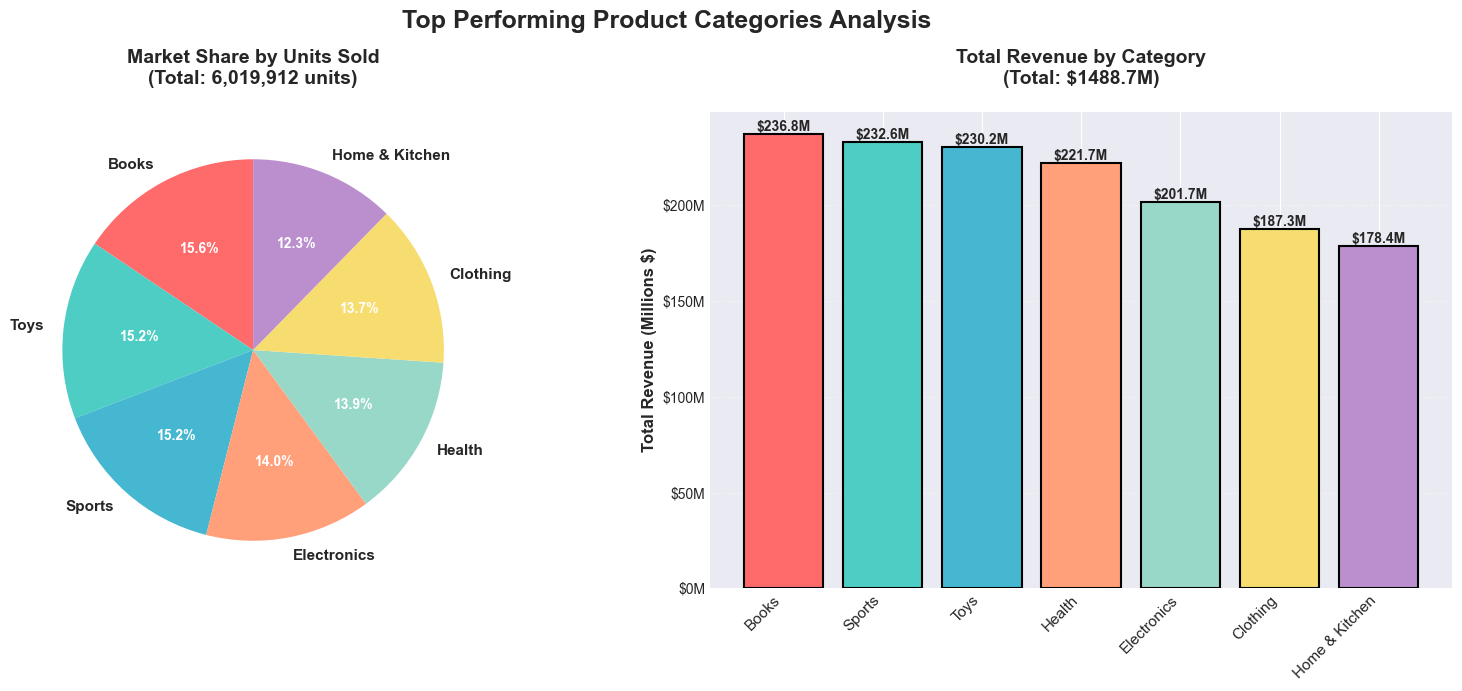

✓ Created: viz2_seasonal_by_category.png


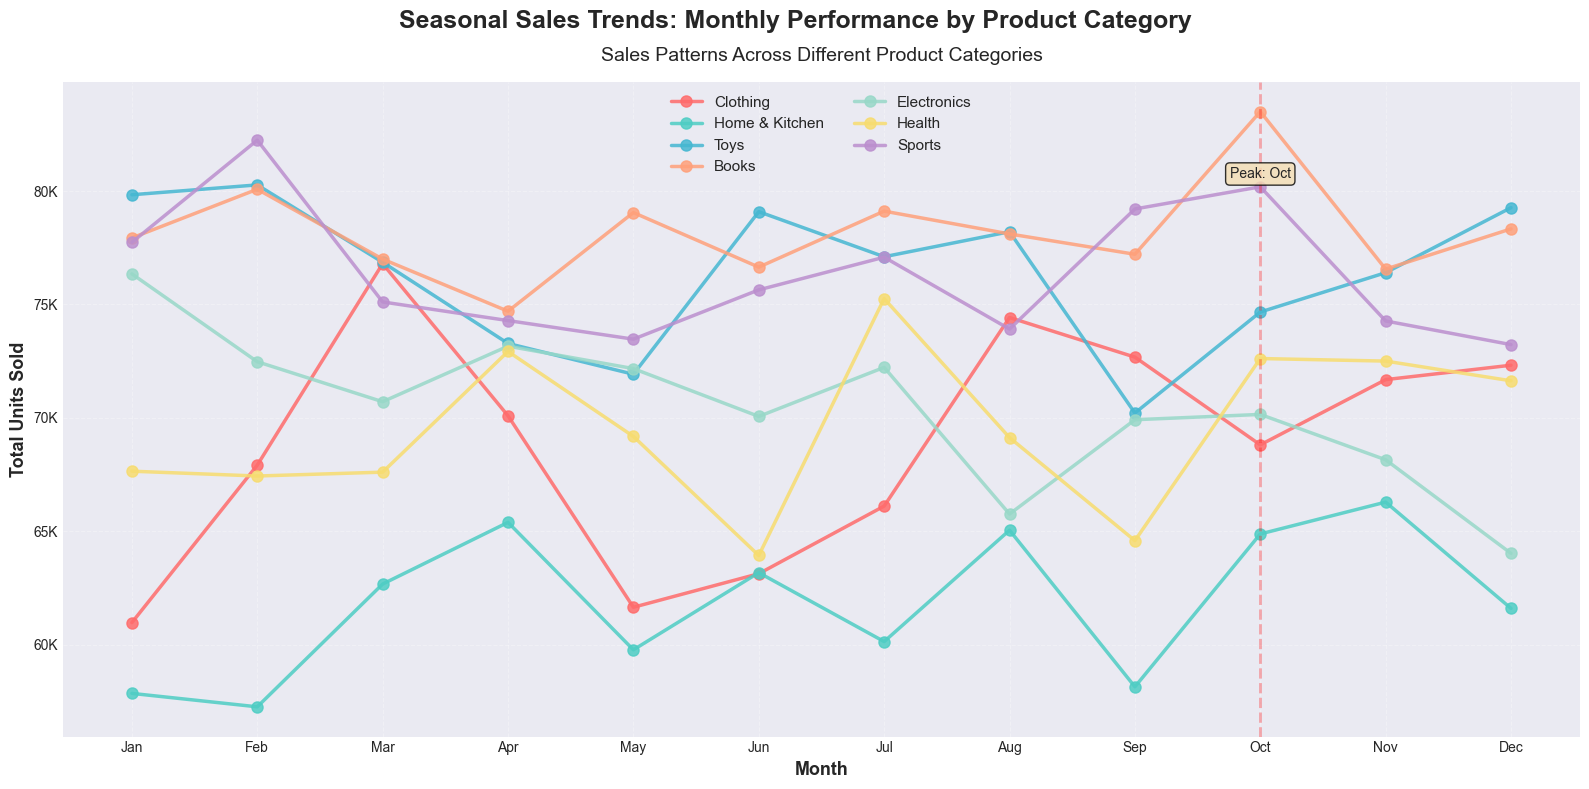

✓ Created: viz3_seasonal_by_price.png


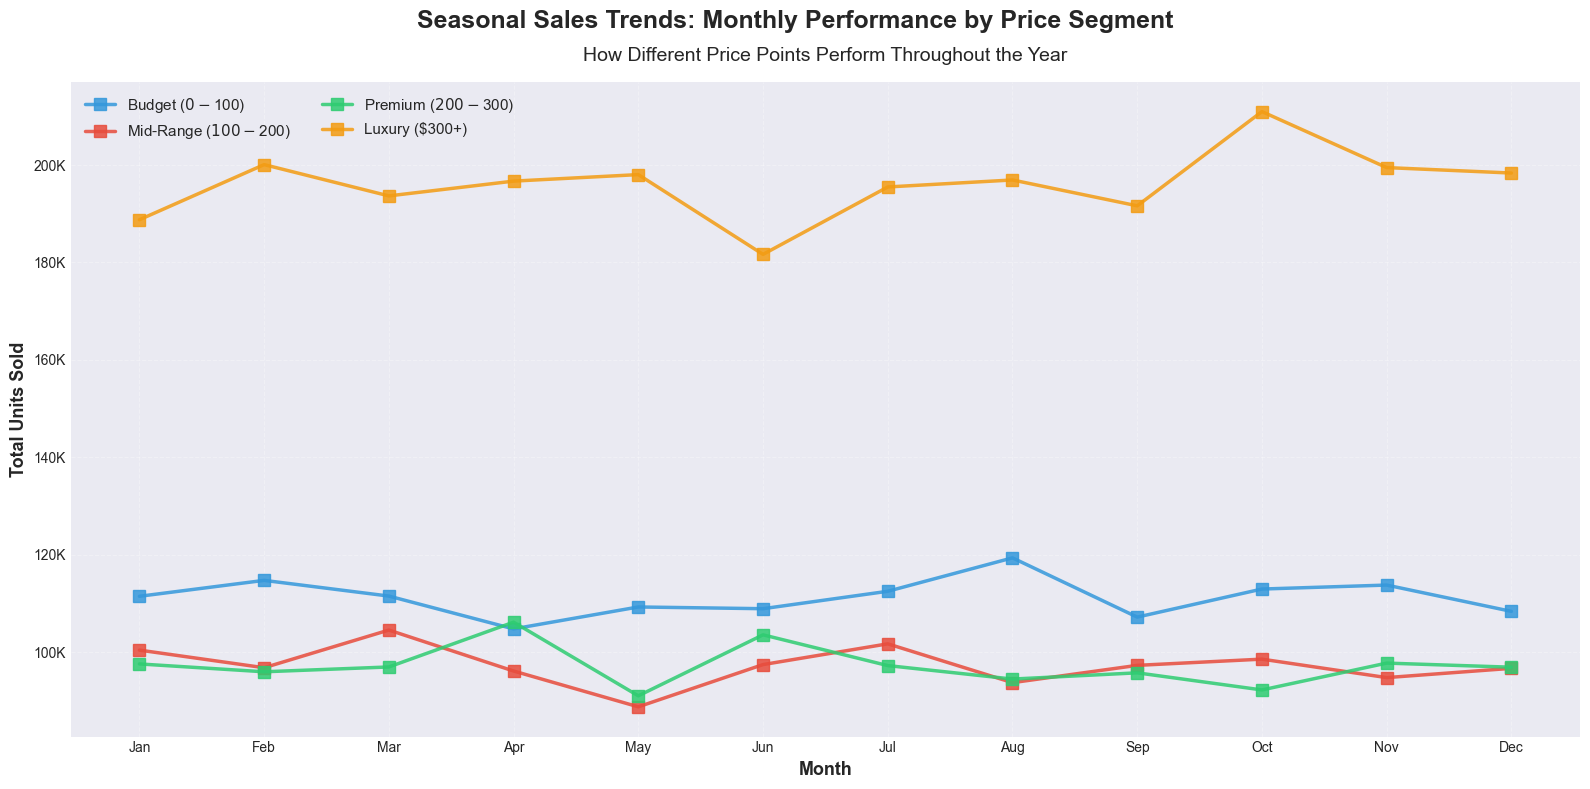


✓ All seasonal trend visualizations created successfully!


In [6]:
# Product Category Visualizations 

sales_cols = [f'sales_month_{i}' for i in range(1, 13)]
df['total_sales'] = df[sales_cols].sum(axis=1)
df['total_revenue'] = df['price'] * df['total_sales']

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
colors_7 = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
colors_4 = ['#3498DB', '#E74C3C', '#2ECC71', '#F39C12']

# =============================================================================
# FIGURE 1: TOP PERFORMING PRODUCT CATEGORIES
# =============================================================================
fig1 = plt.figure(figsize=(16, 7))
fig1.suptitle('Top Performing Product Categories Analysis', fontsize=18, fontweight='bold', y=0.98)

# Pie Chart - Units Sold
ax1 = plt.subplot(1, 2, 1)
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)

wedges, texts, autotexts = ax1.pie(category_sales.values, 
                                     labels=category_sales.index,
                                     colors=colors_7,
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     textprops={'fontsize': 11, 'weight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)

ax1.set_title('Market Share by Units Sold\n(Total: {:,} units)'.format(category_sales.sum()), 
              fontsize=14, fontweight='bold', pad=20)

# Bar Graph - Total Revenue
ax2 = plt.subplot(1, 2, 2)
category_revenue = df.groupby('category')['total_revenue'].sum().sort_values(ascending=False)

bars = ax2.bar(range(len(category_revenue)), category_revenue.values/1e6, color=colors_7, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.1f}M',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.set_xticks(range(len(category_revenue)))
ax2.set_xticklabels(category_revenue.index, rotation=45, ha='right', fontsize=11)
ax2.set_ylabel('Total Revenue (Millions $)', fontsize=12, fontweight='bold')
ax2.set_title('Total Revenue by Category\n(Total: ${:.1f}M)'.format(category_revenue.sum()/1e6), 
              fontsize=14, fontweight='bold', pad=20)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.0f}M'))

plt.tight_layout()
plt.savefig('/Users/dudugalbinski/Desktop/E-Commerce Sales Analysis Project/viz1_category_performance.png',
            dpi=300, bbox_inches='tight')

print("✓ Created: viz1_category_performance.png")
plt.show()
plt.close()

# =============================================================================
# FIGURE 2: SEASONAL TRENDS - BY CATEGORY
# =============================================================================
fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle('Seasonal Sales Trends: Monthly Performance by Product Category', 
              fontsize=18, fontweight='bold', y=0.98)

ax = plt.subplot(1, 1, 1)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot each category
for idx, category in enumerate(df['category'].unique()):
    cat_df = df[df['category'] == category]
    monthly_sales = [cat_df[f'sales_month_{i}'].sum() for i in range(1, 13)]
    ax.plot(months, monthly_sales, marker='o', linewidth=2.5, markersize=8, 
            color=colors_7[idx], label=category, alpha=0.85)

ax.set_xlabel('Month', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Units Sold', fontsize=13, fontweight='bold')
ax.set_title('Sales Patterns Across Different Product Categories', fontsize=14, pad=15)
ax.legend(loc='best', fontsize=11, framealpha=0.9, ncol=2)
ax.grid(True, alpha=0.3, linestyle='--')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# Add annotations for interesting patterns
max_month_idx = np.argmax([df[f'sales_month_{i}'].sum() for i in range(1, 13)])
ax.axvline(x=max_month_idx, color='red', linestyle='--', alpha=0.3, linewidth=2)
ax.text(max_month_idx, ax.get_ylim()[1]*0.95, f'Peak: {months[max_month_idx]}', 
        ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('/Users/dudugalbinski/Desktop/E-Commerce Sales Analysis Project/viz2_seasonal_by_category.png',
            dpi=300, bbox_inches='tight')

print("✓ Created: viz2_seasonal_by_category.png")
plt.show()
plt.close()

# =============================================================================
# FIGURE 3: SEASONAL TRENDS - BY PRICE SEGMENT
# =============================================================================
fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle('Seasonal Sales Trends: Monthly Performance by Price Segment', 
              fontsize=18, fontweight='bold', y=0.98)

ax = plt.subplot(1, 1, 1)

# Create price segments
df['price_segment'] = pd.cut(df['price'], 
                              bins=[0, 100, 200, 300, 500],
                              labels=['Budget ($0-$100)', 'Mid-Range ($100-$200)', 
                                     'Premium ($200-$300)', 'Luxury ($300+)'])

price_segments = ['Budget ($0-$100)', 'Mid-Range ($100-$200)', 'Premium ($200-$300)', 'Luxury ($300+)']

# Plot each price segment
for idx, segment in enumerate(price_segments):
    seg_df = df[df['price_segment'] == segment]
    monthly_sales = [seg_df[f'sales_month_{i}'].sum() for i in range(1, 13)]
    ax.plot(months, monthly_sales, marker='s', linewidth=2.5, markersize=8,
            color=colors_4[idx], label=segment, alpha=0.85)

ax.set_xlabel('Month', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Units Sold', fontsize=13, fontweight='bold')
ax.set_title('How Different Price Points Perform Throughout the Year', fontsize=14, pad=15)
ax.legend(loc='best', fontsize=11, framealpha=0.9, ncol=2)
ax.grid(True, alpha=0.3, linestyle='--')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

plt.tight_layout()
plt.savefig('/Users/dudugalbinski/Desktop/E-Commerce Sales Analysis Project/viz3_seasonal_by_price.png',
            dpi=300, bbox_inches='tight')
print("✓ Created: viz3_seasonal_by_price.png")
plt.show()
plt.close()

print("\n✓ All seasonal trend visualizations created successfully!")

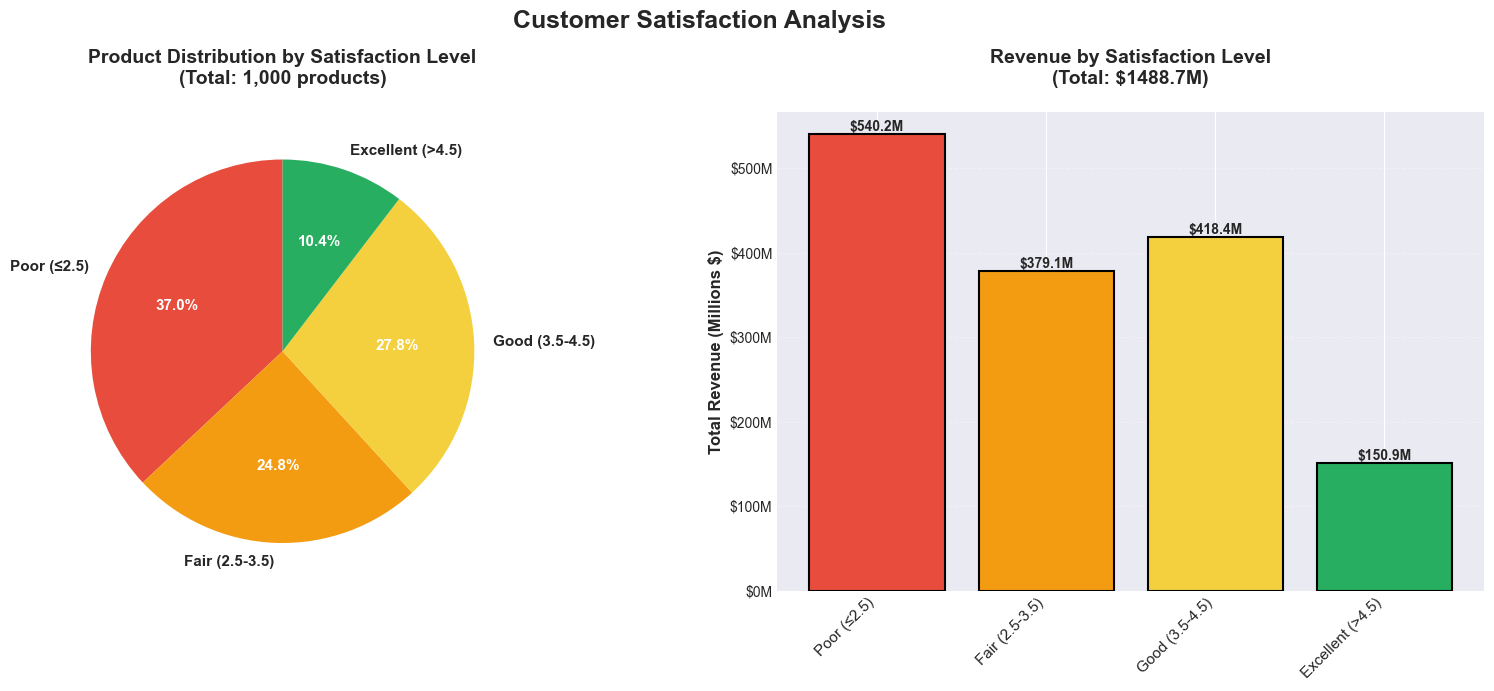

✓ Created: viz4_satisfaction_distribution.png


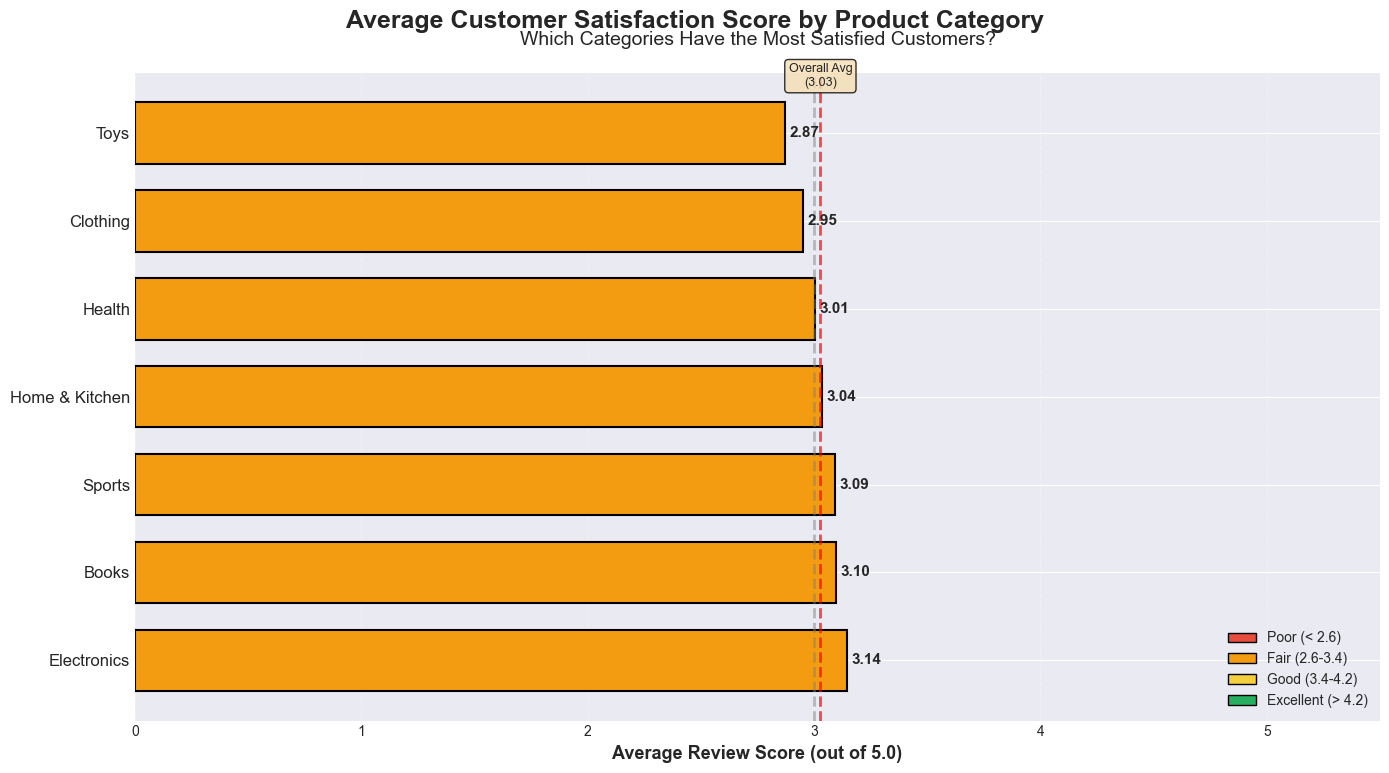

✓ Created: viz5_category_satisfaction.png

✓ All customer satisfaction visualizations created successfully!

SUMMARY OF CREATED VISUALIZATIONS:
1. viz1_category_performance.png - Pie chart (units) + Bar chart (revenue)
2. viz2_seasonal_by_category.png - Line chart by category
3. viz3_seasonal_by_price.png - Line chart by price segment
4. viz4_satisfaction_distribution.png - Pie chart + Bar chart (revenue)
5. viz5_category_satisfaction.png - Bar chart of avg scores


In [8]:
# Customer Satisfaction Visualizations 

sales_cols = [f'sales_month_{i}' for i in range(1, 13)]
df['total_sales'] = df[sales_cols].sum(axis=1)
df['total_revenue'] = df['price'] * df['total_sales']

# Create satisfaction levels
df['satisfaction_level'] = pd.cut(df['review_score'], 
                                   bins=[0, 2.5, 3.5, 4.5, 5.0],
                                   labels=['Poor (≤2.5)', 'Fair (2.5-3.5)', 
                                          'Good (3.5-4.5)', 'Excellent (>4.5)'])

# Color scheme for satisfaction levels (Red -> Yellow -> Light Green -> Dark Green)
satisfaction_colors = ['#E74C3C', '#F39C12', '#F4D03F', '#27AE60']

# =============================================================================
# FIGURE 4: CUSTOMER SATISFACTION - PIE CHART
# =============================================================================
fig4 = plt.figure(figsize=(16, 7))
fig4.suptitle('Customer Satisfaction Analysis', fontsize=18, fontweight='bold', y=0.98)

# Pie Chart - Satisfaction Level Distribution
ax1 = plt.subplot(1, 2, 1)
satisfaction_dist = df['satisfaction_level'].value_counts().sort_index()

wedges, texts, autotexts = ax1.pie(satisfaction_dist.values, 
                                     labels=satisfaction_dist.index,
                                     colors=satisfaction_colors,
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     textprops={'fontsize': 11, 'weight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)

ax1.set_title('Product Distribution by Satisfaction Level\n(Total: {:,} products)'.format(len(df)), 
              fontsize=14, fontweight='bold', pad=20)

# Bar Chart - Revenue by Satisfaction Level
ax2 = plt.subplot(1, 2, 2)
satisfaction_revenue = df.groupby('satisfaction_level', observed=True)['total_revenue'].sum().sort_index()

bars = ax2.bar(range(len(satisfaction_revenue)), satisfaction_revenue.values/1e6, 
               color=satisfaction_colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.1f}M',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.set_xticks(range(len(satisfaction_revenue)))
ax2.set_xticklabels(satisfaction_revenue.index, rotation=45, ha='right', fontsize=11)
ax2.set_ylabel('Total Revenue (Millions $)', fontsize=12, fontweight='bold')
ax2.set_title('Revenue by Satisfaction Level\n(Total: ${:.1f}M)'.format(satisfaction_revenue.sum()/1e6), 
              fontsize=14, fontweight='bold', pad=20)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.0f}M'))

plt.tight_layout()
plt.savefig('/Users/dudugalbinski/Desktop/E-Commerce Sales Analysis Project/viz4_satisfaction_distribution.png',
            dpi=300, bbox_inches='tight')
plt.show()
print("✓ Created: viz4_satisfaction_distribution.png")
plt.close()

# =============================================================================
# FIGURE 5: AVERAGE SATISFACTION SCORE BY CATEGORY
# =============================================================================
fig5 = plt.figure(figsize=(14, 8))
fig5.suptitle('Average Customer Satisfaction Score by Product Category', 
              fontsize=18, fontweight='bold', y=0.96)

ax = plt.subplot(1, 1, 1)

# Calculate average satisfaction by category
category_satisfaction = df.groupby('category')['review_score'].mean().sort_values(ascending=False)

# Color bars based on score (gradient from red to green)
def score_to_color(score):
    # Score ranges from 1-5, normalize to 0-1
    normalized = (score - 1) / 4
    if normalized < 0.4:  # Poor (1-2.6)
        return '#E74C3C'
    elif normalized < 0.6:  # Fair (2.6-3.4)
        return '#F39C12'
    elif normalized < 0.8:  # Good (3.4-4.2)
        return '#F4D03F'
    else:  # Excellent (4.2-5)
        return '#27AE60'

bar_colors = [score_to_color(score) for score in category_satisfaction.values]

bars = ax.barh(range(len(category_satisfaction)), category_satisfaction.values, 
               color=bar_colors, edgecolor='black', linewidth=1.5, height=0.7)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, category_satisfaction.values)):
    width = bar.get_width()
    ax.text(width + 0.02, bar.get_y() + bar.get_height()/2.,
            f'{score:.2f}',
            ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_yticks(range(len(category_satisfaction)))
ax.set_yticklabels(category_satisfaction.index, fontsize=12)
ax.set_xlabel('Average Review Score (out of 5.0)', fontsize=13, fontweight='bold')
ax.set_title('Which Categories Have the Most Satisfied Customers?', fontsize=14, pad=20)
ax.set_xlim(0, 5.5)
ax.axvline(x=3.0, color='gray', linestyle='--', linewidth=2, alpha=0.5, label='Overall Average (3.03)')
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add overall average line
overall_avg = df['review_score'].mean()
ax.axvline(x=overall_avg, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax.text(overall_avg, len(category_satisfaction) - 0.5, 
        f'Overall Avg\n({overall_avg:.2f})', 
        ha='center', va='bottom', fontsize=9, 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Add legend for color coding
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#E74C3C', edgecolor='black', label='Poor (< 2.6)'),
    Patch(facecolor='#F39C12', edgecolor='black', label='Fair (2.6-3.4)'),
    Patch(facecolor='#F4D03F', edgecolor='black', label='Good (3.4-4.2)'),
    Patch(facecolor='#27AE60', edgecolor='black', label='Excellent (> 4.2)')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.savefig('/Users/dudugalbinski/Desktop/E-Commerce Sales Analysis Project/viz5_category_satisfaction.png',
            dpi=300, bbox_inches='tight')
plt.show()
print("✓ Created: viz5_category_satisfaction.png")
plt.close()

print("\n✓ All customer satisfaction visualizations created successfully!")
print("\n" + "="*70)
print("SUMMARY OF CREATED VISUALIZATIONS:")
print("="*70)
print("1. viz1_category_performance.png - Pie chart (units) + Bar chart (revenue)")
print("2. viz2_seasonal_by_category.png - Line chart by category")
print("3. viz3_seasonal_by_price.png - Line chart by price segment")
print("4. viz4_satisfaction_distribution.png - Pie chart + Bar chart (revenue)")
print("5. viz5_category_satisfaction.png - Bar chart of avg scores")
print("="*70)


# E-Commerce Sales Analysis Report
**Dataset Overview:** 1,000 products across 7 categories with 12 months of sales data

---

## 1. TOP-PERFORMING PRODUCT CATEGORIES

### Overall Category Rankings by Total Sales Volume

**Top 3 Categories:**
1. **Books**: 938,229 total units (15.59% market share)
   - 154 products
   - Average 6,092 units per product
   - Total revenue: $236.8 million
   - Average price: $252.52
   - Average review score: 3.10

2. **Toys**: 917,101 total units (15.23% market share)
   - 151 products
   - Average 6,073 units per product
   - Total revenue: $230.2 million
   - Average price: $251.05
   - Average review score: 2.87

3. **Sports**: 916,371 total units (15.22% market share)
   - 153 products
   - Average 5,990 units per product
   - Total revenue: $232.6 million
   - Average price: $253.84
   - Average review score: 3.09

### Key Insights:
- **Books, Toys, and Sports dominate** with approximately 46% of total market share combined
- **Revenue leadership differs from volume**: While Books leads in units sold, Sports generates nearly equivalent revenue despite slightly fewer sales
- **Category performance is relatively balanced**: The spread between highest (Books: 15.59%) and lowest (Home & Kitchen: 12.33%) market share is only 3.26 percentage points
- **Electronics and Health** are mid-tier performers with 14.04% and 13.86% market share respectively
- **Home & Kitchen** lags behind at 12.33% market share with only 125 products (lowest product count)

### Revenue vs. Volume Analysis:
Books leads in both metrics, but the relationship between sales volume and revenue varies:
- **Sports** punches above its weight in revenue (#2 in revenue vs #3 in volume)
- This suggests Sports products command premium prices or have better margins
- **Home & Kitchen** shows the largest gap (lowest in both metrics), indicating potential growth opportunity

---

## 2. IMPACT OF PRICING ON SALES AND CUSTOMER REVIEWS

### Price Segment Performance

| Price Segment | Avg Total Sales | Avg Review Score | Avg Review Count | Product Count |
|---------------|----------------|------------------|------------------|---------------|
| Budget ($0-$100) | 6,096 | 3.00 | 544 | 219 |
| Mid-Range ($100-$200) | 5,985 | 3.07 | 520 | 195 |
| Premium ($200-$300) | 5,979 | 3.05 | 525 | 195 |
| Luxury ($300+) | 6,015 | 3.01 | 521 | 391 |

### Critical Finding: Price Has MINIMAL Impact on Sales

**Correlation Analysis Results:**
- Price vs. Total Sales: **-0.016** (virtually no correlation)
- Price vs. Review Score: **+0.029** (negligible positive correlation)
- Price vs. Review Count: **+0.042** (negligible positive correlation)
- Review Score vs. Sales: **-0.018** (virtually no correlation)

### Key Insights:

1. **Price is NOT a determining factor for sales success**
   - Budget products ($0-$100) actually sell slightly MORE on average (6,096 units) than premium products
   - The difference across all price segments is less than 2% (6,096 vs 5,979 units)
   - Higher prices do NOT deter customers in this dataset

2. **Customer satisfaction is price-agnostic**
   - All price segments hover around 3.0 review score
   - Mid-range products ($100-$200) have the highest satisfaction at 3.07
   - Review counts remain consistent across price points (520-544 reviews)

3. **Sales performance quartile analysis reveals surprising patterns:**
   - **Very High Performers** (top 25% by sales): Average price $262.69
   - **High Performers**: Average price $234.88 (lowest!)
   - **Low Performers** (bottom 25%): Average price $247.20
   - This suggests **other factors drive sales** more than price

4. **Best-sellers vs. Poor performers:**
   - Top 50 products average price: **$212.96** with 3.23 review score
   - Bottom 50 products average price: **$269.97** with 3.09 review score
   - **Lower-priced products slightly outperform**, but the correlation is weak

### Strategic Implications:
- **Quality, marketing, and product-market fit matter more than price**
- Companies can maintain premium pricing without fear of significantly impacting sales
- Budget pricing does not guarantee higher sales volumes
- Customer satisfaction remains consistent regardless of price point

---

## 3. SEASONAL SALES TRENDS AND PATTERNS

### Monthly Sales Performance (All Products Combined)

**Peak Months:**
1. **October**: 514,798 units (+2.62% vs average)
2. **February**: 507,661 units (+1.20% vs average)
3. **July**: 507,011 units (+1.07% vs average)

**Lowest Months:**
1. **May**: 487,194 units (-2.88% vs average)
2. **June**: 491,653 units (-1.99% vs average)
3. **September**: 491,934 units (-1.94% vs average)

**Average Monthly Sales**: 501,659 units

### Key Finding: SURPRISINGLY FLAT SEASONALITY

The data reveals **remarkably consistent sales throughout the year** with only a **5.7% variance** between the highest (October) and lowest (May) months. This is much flatter than typical retail patterns.

### Quarterly Performance (Nearly Perfect Balance)

| Quarter | Total Sales | % of Annual Sales |
|---------|-------------|-------------------|
| Q4 (Oct-Dec) | 1,521,022 | 25.3% |
| Q1 (Jan-Mar) | 1,512,706 | 25.1% |
| Q3 (Jul-Sep) | 1,503,514 | 25.0% |
| Q2 (Apr-Jun) | 1,482,670 | 24.6% |

Only **2.6% difference** between strongest (Q4) and weakest (Q2) quarters.

### Category-Specific Seasonal Patterns

Different categories show distinct seasonal behaviors:

**1. CLOTHING (23.0% variation - Most Seasonal)**
- **Peak**: March (76,796 units) - Spring fashion season
- **Low**: January (60,966 units) - Post-holiday slump
- Strong seasonal influence suggests weather/fashion-driven purchases

**2. ELECTRONICS (17.5% variation)**
- **Peak**: January (76,347 units) - Holiday gift spending aftermath
- **Low**: December (64,019 units) - Pre-holiday pause
- Pattern suggests post-holiday replacement/upgrade cycle

**3. HEALTH (16.3% variation)**
- **Peak**: July (75,256 units) - Summer wellness focus
- **Low**: June (63,926 units)
- Mid-year surge possibly related to summer fitness goals

**4. HOME & KITCHEN (14.6% variation)**
- **Peak**: November (66,281 units) - Holiday preparation
- **Low**: February (57,252 units) - Post-holiday lull

**5. TOYS (13.2% variation)**
- **Peak**: February (80,271 units) - Unexpected pattern
- **Low**: September (70,209 units)
- Notably NOT December-peaked, suggesting birthday/occasion-driven rather than holiday-driven

**6. SPORTS (11.8% variation)**
- **Peak**: February (82,244 units) - Winter sports/New Year fitness resolutions
- **Low**: December (73,226 units)

**7. BOOKS (11.3% variation - Least Seasonal)**
- **Peak**: October (83,504 units) - Back-to-school/fall reading season
- **Low**: April (74,699 units)
- Most consistent category year-round

### Strategic Insights:

1. **Overall business shows strong stability** - minimal seasonal risk
2. **Category-specific strategies needed**:
   - Heavy inventory for Clothing in early spring
   - Electronics promotions should target January (not just December)
   - Toys defy traditional holiday patterns - investigate birthday/occasion market
3. **May-June summer slump** affects multiple categories - opportunity for targeted promotions
4. **October-February period** is consistently strong across most categories

---

## 4. CUSTOMER SATISFACTION EVALUATION

### Overall Satisfaction Metrics
- **Average Review Score**: 3.03 out of 5.0 ⚠️
- **Median Review Score**: 3.10
- **Average Review Count**: 527 reviews per product
- **Median Review Count**: 543 reviews

### CRITICAL FINDING: Customer Satisfaction is MEDIOCRE

### Product Distribution by Satisfaction Level

| Satisfaction Level | % of Products | Avg Sales | Avg Reviews | Avg Price |
|-------------------|---------------|-----------|-------------|-----------|
| **Poor (≤2.5)** | **37.0%** | 6,054 | 522 | $242.64 |
| Fair (2.5-3.5) | 24.8% | 6,046 | 527 | $253.00 |
| Good (3.5-4.5) | 27.8% | 5,999 | 519 | $249.98 |
| Excellent (>4.5) | **10.4%** | 5,891 | 562 | $246.74 |

### Alarming Insights:

1. **61.8% of products score below 3.5 out of 5** - this is a significant quality concern
2. **Only 10.4% achieve "Excellent" ratings** (>4.5) - very few standout products
3. **37% of products are in the "Poor" category** - more than one-third of the catalog has serious quality issues
4. **Poor products actually sell MORE** (6,054 units) than Excellent products (5,891 units)

### Customer Satisfaction by Category

| Category | Avg Score | Rating | Total Reviews |
|----------|-----------|--------|---------------|
| Electronics | 3.14 | Highest | 73,862 |
| Books | 3.10 | Above Average | 79,263 |
| Sports | 3.09 | Above Average | 83,726 |
| Home & Kitchen | 3.04 | Average | 67,735 |
| Health | 3.01 | Below Average | 72,398 |
| Clothing | 2.95 | Below Average | 70,347 |
| **Toys** | **2.87** | **Lowest** ⚠️ | 79,175 |

**Key Observations:**
- **Electronics leads** in customer satisfaction (3.14) despite being tied for 4th in sales
- **Toys has the lowest satisfaction** (2.87) yet is #2 in sales volume - major disconnect!
- **Customer engagement is high** across all categories (67K-83K total reviews)
- Sports has the highest total review engagement (83,726) - most active customer base

### Review Engagement Analysis

| Engagement Level | Avg Review Score | Avg Sales | Review Range |
|-----------------|------------------|-----------|--------------|
| Low Engagement | 2.96 | 6,184 | 0-283 reviews |
| Medium Engagement | 3.10 | 5,932 | 284-543 reviews |
| High Engagement | 2.93 | 6,048 | 544-769 reviews |
| Very High Engagement | 3.11 | 5,914 | 770-1,000 reviews |

**Surprising Finding**: Review count and quality have **NEGATIVE correlation with sales** (-0.069)
- Products with fewer reviews actually sell slightly better
- This suggests reviews may not be driving purchase decisions as expected
- OR negative reviews are coming AFTER sales (complaints from buyers)

### Examples of Rating Extremes

**Highest Rated Products (5.0 score):**
- Product_12 (Health): 991 reviews, 5,961 sales, $485.11 - highly engaged customers
- Product_55 (Books): 314 reviews, 6,926 sales, $300.96 - strong sales despite fewer reviews
- Product_334 (Health): 935 reviews, 5,618 sales, $62.46 - budget-friendly winner

**Lowest Rated Products (1.0 score):**
- Product_753 (Clothing): 612 reviews, **7,207 sales**, $315.72 - still selling despite terrible reviews!
- Product_169 (Books): 436 reviews, **7,757 sales**, $25.18 - highest sales in bottom 10
- Product_265 (Home & Kitchen): 645 reviews, 7,442 sales, $439.30 - premium price, terrible reviews

### Critical Strategic Implications:

1. **Quality crisis**: 37% poor-rated products is unacceptable and threatens long-term brand health
2. **Reviews don't prevent sales** - customers are buying despite negative feedback
   - This could indicate: weak review visibility, impulse purchases, or price-driven decisions
   - **Risk**: Dissatisfied customers may not return or may spread negative word-of-mouth
3. **Toys category needs urgent attention**: Lowest satisfaction (2.87) yet high sales suggests short-term thinking
4. **Opportunity in Electronics**: Already the highest-rated category - double down here
5. **Review-sales disconnect** suggests:
   - Review system may not be prominent enough in purchase flow
   - Customers may be making decisions based on other factors (price, images, descriptions)
   - Post-purchase satisfaction is not affecting behavior

### Recommendations:

1. **Immediate**: Audit the 370 products (37%) with poor ratings for quality improvements or removal
2. **Focus on Toys quality**: Address why the 2nd best-selling category has the worst reviews
3. **Investigate why poor reviews don't deter sales**: Are customers even seeing them?
4. **Leverage Electronics success**: This category has cracked the quality code
5. **Improve review visibility**: If reviews aren't affecting behavior, they're not prominent enough

---

## OVERALL CONCLUSIONS & STRATEGIC RECOMMENDATIONS

### Major Findings Summary:

1. **Market is surprisingly balanced** with top 3 categories commanding only 46% of sales
2. **Price does NOT drive sales or satisfaction** - correlation is virtually zero
3. **Seasonality is minimal** - only 5.7% variance across months (very stable business)
4. **Customer satisfaction is mediocre** - 3.03/5.0 average with 37% rated poorly
5. **Reviews don't correlate with sales** - even 1.0-rated products sell well

### Strategic Priorities:

**CRITICAL (Address Immediately):**
1. **Product Quality Overhaul**: 37% of products rated ≤2.5 is a crisis
2. **Toys Category Investigation**: Why is #2 seller also lowest-rated?
3. **Review System Audit**: Why aren't negative reviews preventing purchases?

**HIGH PRIORITY:**
1. Invest in **Books, Toys, and Sports** - proven performers
2. Capitalize on **October-February strength** with aggressive marketing
3. Address **May-June slump** with targeted promotions
4. Learn from **Electronics' quality success** (highest rated category)

**STRATEGIC OPPORTUNITIES:**
1. **Premium pricing is safe** - price doesn't deter buyers; focus on value perception
2. **Home & Kitchen underperformance** - lowest market share with growth potential
3. **Year-round consistency** - stable cash flow enables predictable planning
4. **Category-specific seasonal strategies** - particularly Clothing (23% variation)

### Business Health Assessment:
✅ **Strengths**: Stable year-round sales, balanced category portfolio, price flexibility  
⚠️ **Concerns**: Mediocre satisfaction, quality issues, review system ineffectiveness  
🔴 **Critical Risks**: 37% poor-rated products, potential brand reputation damage

**Bottom Line**: The business has strong fundamentals (balanced categories, stable seasonality, price-insensitive customers) but is sitting on a quality time bomb. Immediate action on product quality—especially in Toys and among the 370 poorly-rated products—is essential to prevent future customer attrition and brand damage.